# Import Libraries

In [ ]:
#import libraries
import pandas as pd
import seaborn as sns

# Download dataset from Kaggle

In [ ]:
#set kaggle API credentials
import os
os.environ['KAGGLE_USERNAME'] = 'yashinde18'
os.environ['KAGGLE_KEY'] = '4e4bf5d550daf12c3efd4f2b5915b462'

In [ ]:
#download dataset
! kaggle datasets download -d uciml/breast-cancer-wisconsin-data

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 29.6MB/s]


In [ ]:
#unzip file
! unzip /content/breast-cancer-wisconsin-data.zip

Archive:  /content/breast-cancer-wisconsin-data.zip
  inflating: data.csv                


# Load & Explore Data

In [ ]:
#load data on dataframe
df = pd.read_csv('/content/data.csv')


In [ ]:
#display dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#count of rows and columns
df.shape

(569, 33)

In [ ]:
#count number of null(empty) values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
# Drop the column with null values
df.dropna(axis = 1, inplace = True)

In [ ]:
# count of rows and columns
df.shape

(569, 32)

In [ ]:
#Get count of number of M or B cells in diagnosis
df['diagnosis'].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

# Label Encoding

In [ ]:
#Get Datatypes of each column in our dataset
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
#Encode the diagnosis values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:, 1] = labelencoder.fit_transform(df.iloc[:, 1].values)   # to convert M & B to 1 & 0 and store it in diagnosis column

In [ ]:
#display df
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

# Split Dataset & Feature Scaling

In [ ]:
#Splitting the dataset into independent and dependent datasets 
X = df.iloc[:, 2 : ].values
y = df.iloc[:, 1].values

In [ ]:
#Splitting datasets into training(75%) and testing(25%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
#Scaling the data(feature scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
#print data
X_train

array([[-0.08338042, -0.03395801, -0.15495441, ..., -0.52371226,
        -0.92002167, -0.45535977],
       [ 0.33316181, -1.1524371 ,  0.42060987, ...,  1.82268556,
         2.72748339,  0.80899884],
       [ 0.94640454,  4.46690965,  0.87621268, ...,  1.33645484,
        -0.13559501,  0.02653192],
       ...,
       [-0.21644253,  0.49159241, -0.26154038, ..., -0.08208986,
         0.08694857, -0.70197176],
       [-1.29250996, -0.26304409, -1.32531024, ..., -1.73557172,
        -1.62553217, -1.01873595],
       [ 0.22034829, -0.40903031,  0.18444879, ...,  0.74316413,
         0.74984434, -0.70143212]])

# Build a Logistic Regression Model

In [ ]:
#build a logistic regression classifier (good for binary classification)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [ ]:
#make use of trained model to make predictions on test data
pred = lr.predict(X_test)

# Performance Evaluation

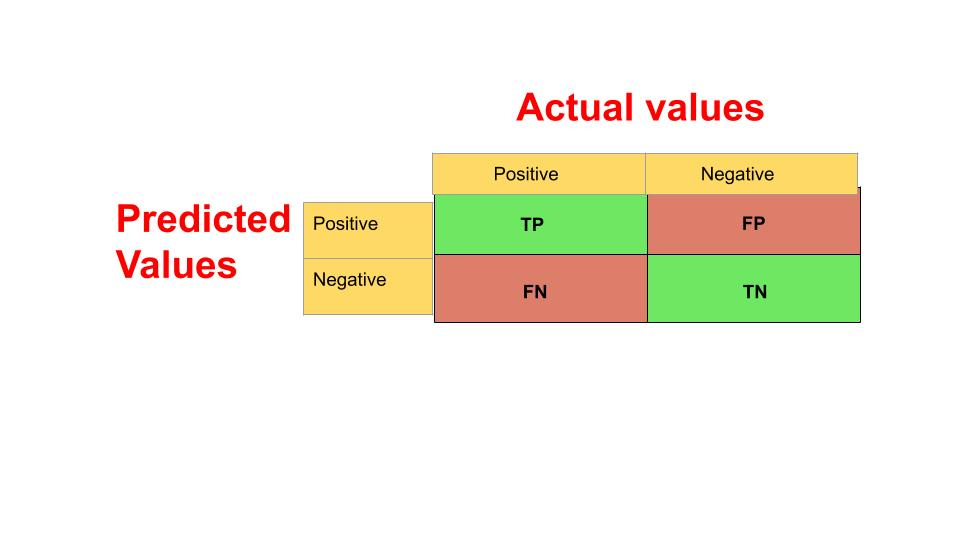

In [ ]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, pred)
print(cm)

[[92  2]
 [ 1 48]]


[Text(33.0, 0.5, 'Predicted Value'), Text(0.5, 15.0, 'Actual Value')]

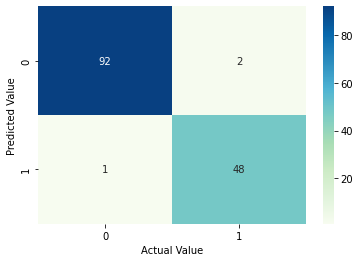

In [ ]:
hm = sns.heatmap(cm, annot = True, cmap = 'GnBu')
hm.set(xlabel = 'Actual Value', ylabel = 'Predicted Value')

In [1]:
recall = (48/(48+2))
print(recall)

0.96


In [ ]:
#get accuracy score for model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.9790209790209791
